In [1455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import weibull_min
import statistics
from sklearn.linear_model import LinearRegression
from scipy.stats import dweibull




https://data.gov.ie/dataset/smartbay-ireland-galway-bay-buoy-weather
#https://www.digitalocean.com/community/tutorials/markdown-markdown-images

[![]("https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg")]
<img src="https://www.smartbay.ie/sites/default/files/front/research_new_2_0.jpg" alt="Image description" width="700" height="300">

### Introduction
My dataset is from Smartbay https://www.smartbay.ie/about which is "Irelands key national facility for advanced marine research and the development of marine technologies, sensors and equipment expanding the Blue Economy and improving our ocean knowledge. It was set up in 1991. I have synthesised a dataset simulating 4 variables. 
1. Air Temperature (Degrees C)
2. Barometric Pressure (inches)
3. Wind Direction (Degrees Magnetic)
4. Wind Speed (Knot)

I will go through the distribuiton I have used to synthesise each variable below.

After reading .csv file, I can see the original dataset contains 8 variables. I decided to drop 4 variables using .drop() to have a more concise dataset.

In [1456]:
#nrows = 267
df1=pd.read_csv('http://data.marine.ie/downloads/SmartBayIreland/GalwaySampleWeatherData.csv',)
#https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df1 = df1.drop(['Longitude','Latitude','Wind Direction (Degrees True)','Barometric Pressure (Millibars)',"Wind Speed (Meters/Sec)"],axis =1)
df1
#df1.loc[df1.loc[:,'SensorTimestamp'] >= '14/08/2015']



,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
0,11/08/2015 14:54:33,11.7,30.1974,247.8,9.9
1,11/08/2015 14:54:42,11.9,30.2003,247.8,11.1
2,11/08/2015 14:56:59,11.9,30.2003,257.1,11.7
3,13/08/2015 10:50:11,15.1,30.0911,173.7,6.5
4,13/08/2015 12:02:42,11.4,30.0645,258.1,10.1
...,...,...,...,...,...
1606,19/02/2016 10:04:15,6.1,29.6894,251.5,27.0
1607,19/02/2016 10:09:15,6.2,29.6865,240.2,23.4
1608,19/02/2016 10:14:15,6.2,29.6835,248.6,25.1
1609,19/02/2016 10:19:15,6.3,29.6835,246.7,25.7


Four of the variables in my dataset are non null float64 variables, also known as the double precision floating point. This datatype is part of the numpy module in python, These usually occupy 64 bits in computer memory. This type of variable can be positive, negative or 0. The IEEE 754 standard specifies a binary64 as having: Sign @ 1 bit,exponent @ 11 bit and Significand precision @ 53 bits (52 explicitly stored) https://en.wikipedia.org/wiki/Double-precision_floating-point_format.                                                                                                                                        The fifth variable is one I created in steps above called datetime is of type datetime64[ns]. This can be either a date unit or time unit. "the date units are years (‘Y’), months (‘M’), weeks (‘W’), and days (‘D’), while the time units are hours (‘h’), minutes (‘m’), seconds (‘s’), milliseconds (‘ms’), and some additional SI-prefix seconds-based units. The datetime64 data type also accepts the string “NAT”, in any combination of lowercase/uppercase letters, for a “Not A Time” value." https://numpy.org/doc/stable/reference/arrays.datetime.html

To display the type of varaiable, I ran .dtypes & .info() commands.

1. Air Temperature (Degrees C)                 float64
2. Barometric Pressure (inches)                float64
3. Wind Direction (Degrees Magnetic)           float64
4. Wind Speed (Knot)                           float64
5. datetime                                    datetime64[ns]

In [1457]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1611 entries, 0 to 1610
Data columns (total 5 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   SensorTimestamp                    1611 non-null   object 
 1   Air Temperature (Degrees C)        1611 non-null   float64
 2   Barometric Pressure (inches)       1611 non-null   float64
 3   Wind Direction (Degrees Magnetic)  1611 non-null   float64
 4   Wind Speed (Knot)                  1611 non-null   float64
dtypes: float64(4), object(1)
memory usage: 63.1+ KB


Displaying data types of each variable using .dtypes command

In [1458]:
df1.dtypes

SensorTimestamp                       object
Air Temperature (Degrees C)          float64
Barometric Pressure (inches)         float64
Wind Direction (Degrees Magnetic)    float64
Wind Speed (Knot)                    float64
dtype: object

Below is plot of all 4 variables

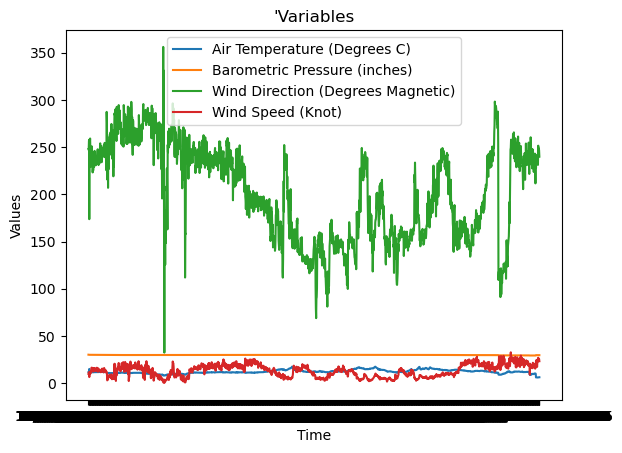

In [1459]:
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Barometric Pressure (inches)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df1, x = "SensorTimestamp", y = "Wind Speed (Knot)")
plt.title("'Variables")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
plt.show()

creating new data frame to convert variable SensorTimestamp to dtype: datetime64

SensorTimestamp column is int 64 bit, the following steps to create new column called datetime with type as a datetime. To filter on a paticular date, I have set the datetime column as the index column. I am filtering data to a single day (16th Aug 2015) which has 272 datapoints. 

In [1460]:
df1['SensorTimestamp']
pd.to_datetime(df1['SensorTimestamp'])
df1['datetime'] = pd.to_datetime(df1['SensorTimestamp'])
df1.set_index('datetime', inplace=True)
df2=df1.loc['2015-08-16']
#df1['datetime']


In [1461]:
df2

,SensorTimestamp,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
datetime,,,,,
2015-08-16 00:00:25,16/08/2015 00:00:25,11.5,29.9168,229.0,16.4
2015-08-16 00:05:25,16/08/2015 00:05:25,11.6,29.9227,231.2,16.0
2015-08-16 00:10:25,16/08/2015 00:10:25,11.5,29.9198,232.5,14.3
2015-08-16 00:15:25,16/08/2015 00:15:25,11.7,29.9198,231.3,12.2
2015-08-16 00:20:25,16/08/2015 00:20:25,11.6,29.9198,218.9,17.0
...,...,...,...,...,...
2015-08-16 23:36:31,16/08/2015 23:36:31,12.0,30.0350,151.8,4.6
2015-08-16 23:41:32,16/08/2015 23:41:32,12.3,30.0320,145.4,5.1
2015-08-16 23:46:32,16/08/2015 23:46:32,12.2,30.0320,147.5,4.7


Plot of filtered dataset with new datetime variable

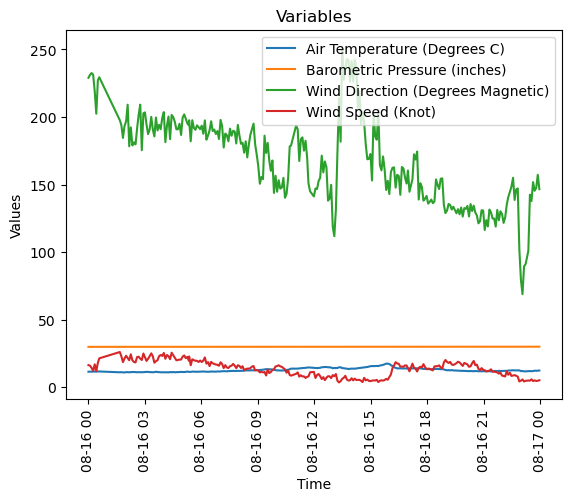

In [1462]:
sns.lineplot(data=df2, x = "datetime", y = "Air Temperature (Degrees C)")
sns.lineplot(data=df2, x = "datetime", y = "Barometric Pressure (inches)")
sns.lineplot(data=df2, x = "datetime", y = "Wind Direction (Degrees Magnetic)")
sns.lineplot(data=df2, x = "datetime", y = "Wind Speed (Knot)")
plt.title("Variables")
plt.xlabel("Time")
plt.xticks(rotation=90)
plt.ylabel("Values")
plt.legend(["Air Temperature (Degrees C)","Barometric Pressure (inches)","Wind Direction (Degrees Magnetic)","Wind Speed (Knot)"])
plt.show()


I used .describe() to display count, mean, standard deviation, min, 25%, 50%, 75% and max values. These values especially the mean and standard deviation will be used as inputs into distribution model later.

In [1463]:
df2.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,272.000000,272.000000,272.000000,272.000000
mean,12.801838,29.962294,168.141912,13.728676
std,1.415816,0.034941,32.276567,5.782885
min,11.000000,29.908000,68.900000,3.600000
25%,11.700000,29.931600,142.875000,8.575000
50%,12.400000,29.961100,170.050000,14.200000
75%,13.900000,29.982525,191.100000,18.025000
max,17.500000,30.035000,252.200000,26.100000


I dont have a categorical variable in my dataset to model

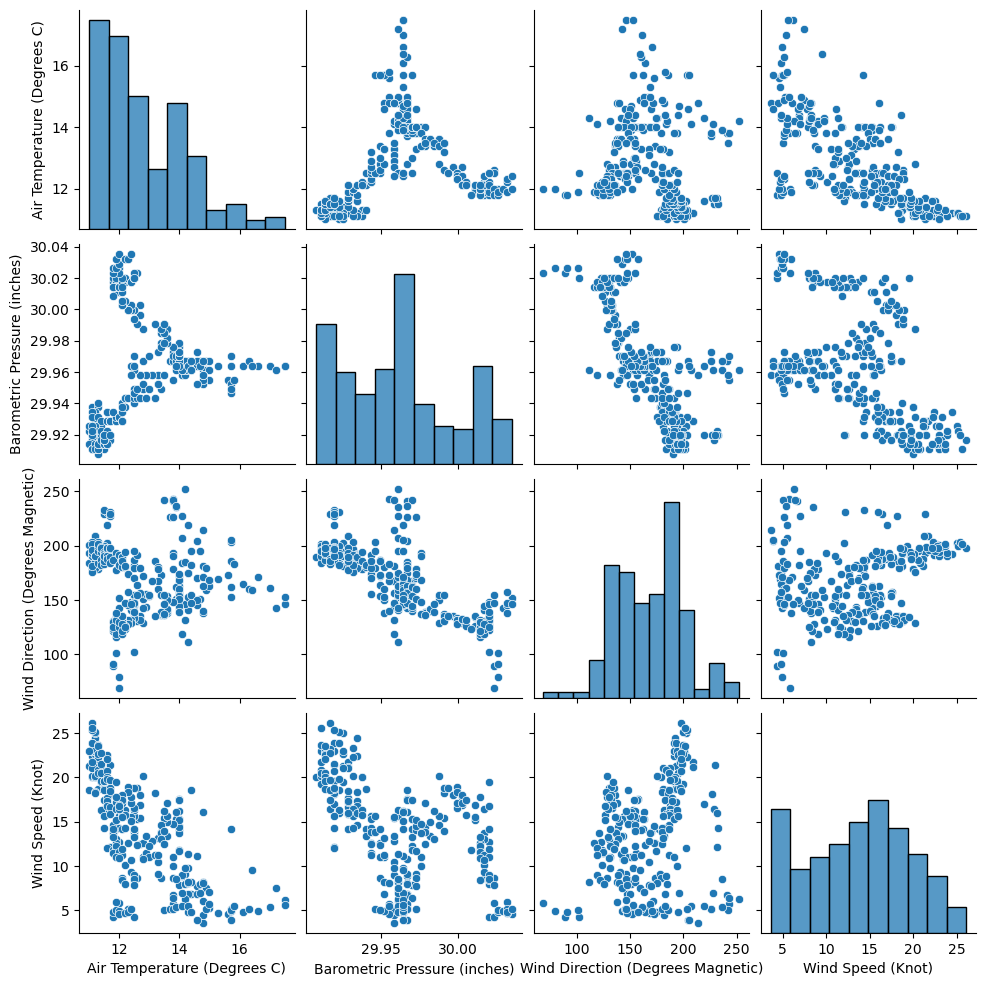

In [1464]:
sns.pairplot(df2)
plt.show()

<AxesSubplot:title={'center':'Air Temp vs Barometric Pressure (inches)'}, xlabel='Air Temperature (Degrees C)'>

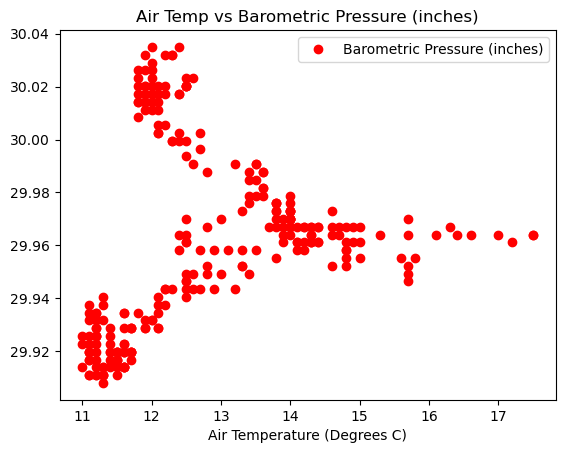

In [1465]:
df2.plot(x='Air Temperature (Degrees C)', y='Barometric Pressure (inches)', style='ro', title="Air Temp vs Barometric Pressure (inches)")

<AxesSubplot:title={'center':'Air Temp and Wind Speed'}, xlabel='Air Temperature (Degrees C)'>

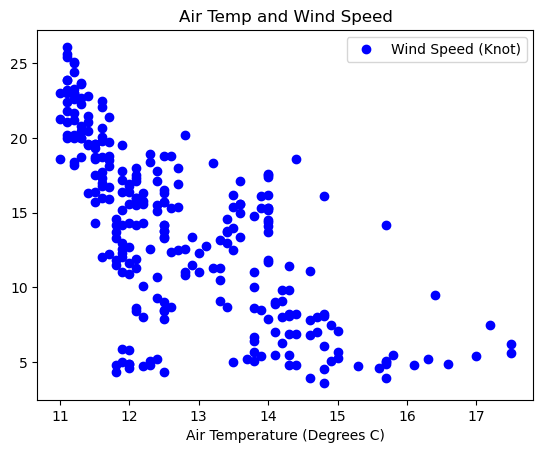

In [1466]:
df2.plot(x='Air Temperature (Degrees C)', y='Wind Speed (Knot)', style='bo', title="Air Temp and Wind Speed")

In [1467]:
idx1 = pd.date_range(start = "2023-11-08 00:00:33", periods=100, freq="MIN")

#Air

#random triangular https://numpy.org/doc/stable/reference/random/generated/numpy.random.triangular.html

 #dweibull https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull 
 The weibull distribuution is a continious probaility distribuion used to model a wide range of random variables http://www.thphys.nuim.ie/Notes/EE304/Notes/LEC10/ExpWeibull_handout.pdf. When synthessing Air Temperature (Degrees C), I am using Dweibull https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.dweibull.html#scipy.stats.dweibull, which is a double Weibull continious random variable, typically used to model the failure rate of a system over time. 
I assigned the shape value = mean and scale = std dev as I found by doing this it matches original data set more closely.

In [1468]:
mean = 12.801
std_dev = 1.415
shape = mean
scale = std_dev

np.random.seed(54)
ts01 = pd.DataFrame(data = dweibull.rvs(2,shape, scale,len(idx1)),index =idx1, columns=['Synthesised Air Temperature (Degrees C)'])

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

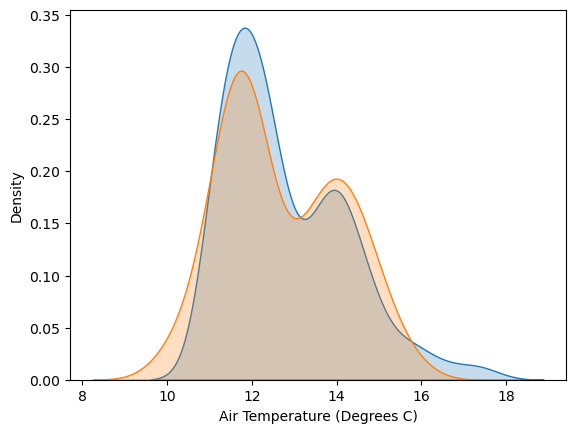

In [1469]:
sns.kdeplot(df2['Air Temperature (Degrees C)'],shade=True)
sns.kdeplot(ts01['Synthesised Air Temperature (Degrees C)'],shade=True)

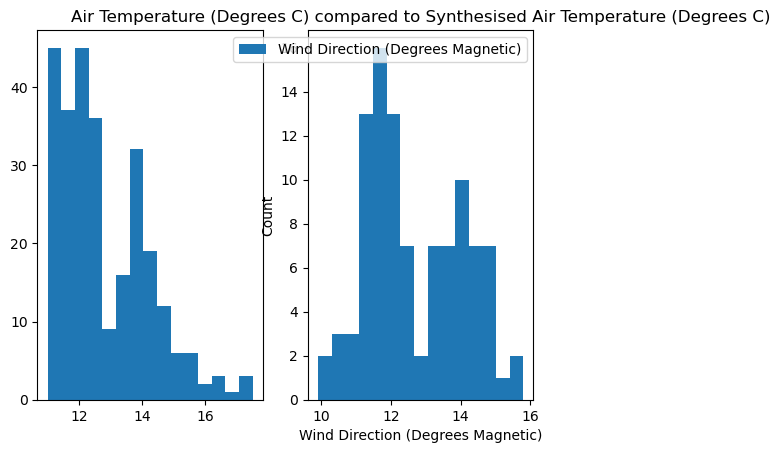

In [1470]:
plt.subplot(1,2,1)
plt.hist(df2["Air Temperature (Degrees C)"], bins =15)
plt.subplot(1,2,2)
plt.hist(ts01["Synthesised Air Temperature (Degrees C)"], bins =15)
plt.title("Air Temperature (Degrees C) compared to Synthesised Air Temperature (Degrees C)")
plt.xlabel("Wind Direction (Degrees Magnetic)")
plt.ylabel("Count")
plt.legend(["Wind Direction (Degrees Magnetic)", "Synthesised Wind Direction (Degrees Magnetic)"])
plt.show()

Barometric

In [1471]:
mean = 29.962
std_dev = .034
shape = mean
scale = std_dev

np.random.seed()
#45,48
ts02 = pd.DataFrame(data = dweibull.rvs(2,shape, scale,len(idx1)),index =idx1, columns=['Barometric'])

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

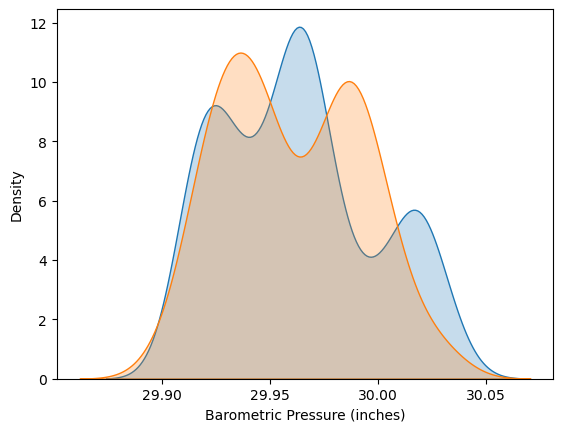

In [1472]:
sns.kdeplot(df2['Barometric Pressure (inches)'],shade=True)
sns.kdeplot(ts02['Barometric'],shade=True)

In [1473]:
rng=np.random.default_rng(seed=61)
ts002 = pd.DataFrame(data=rng.normal(29.962, .034,len(idx1)),index =idx1, columns=['Synthesised Barometric'])

<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

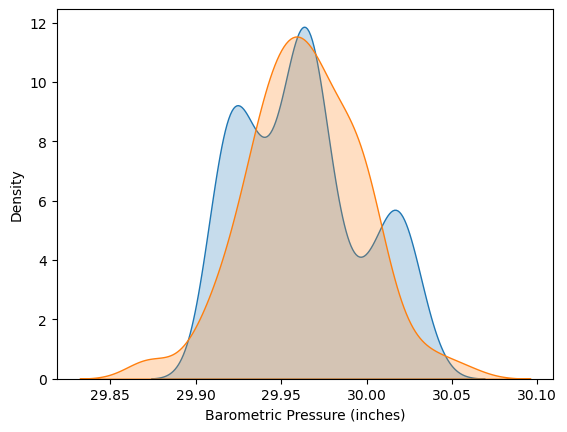

In [1474]:
sns.kdeplot(df2['Barometric Pressure (inches)'],shade=True, label="actual")
sns.kdeplot(ts002['Synthesised Barometric'],shade=True, label="simulated")

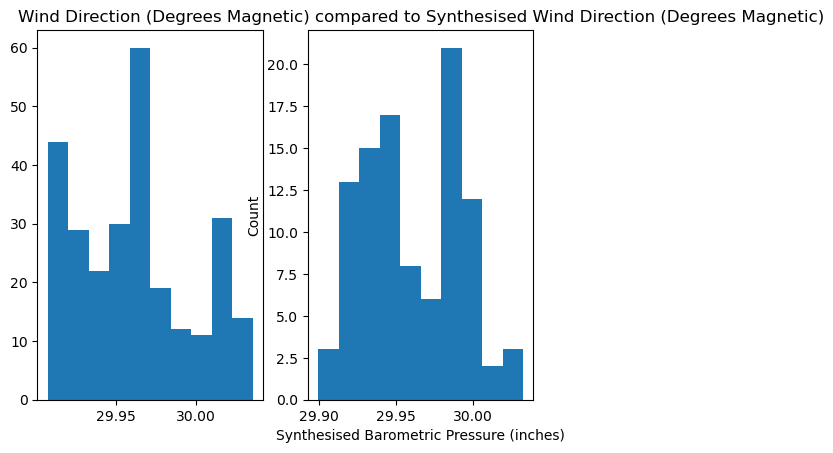

In [1475]:
plt.subplot(1,2,1)
plt.hist(df2["Barometric Pressure (inches)"], bins =10)
plt.subplot(1,2,2)
plt.hist(ts02["Barometric"], bins =10)
plt.title("Wind Direction (Degrees Magnetic) compared to Synthesised Wind Direction (Degrees Magnetic)")
plt.xlabel("Synthesised Barometric Pressure (inches)")
plt.ylabel("Count")
plt.show()

###Wind Direction (Degrees Magnetic)
mean and std dev info from .describe above.

In [1476]:
mean = 168.141
std_dev = 32.276
shape = mean
scale = std_dev

np.random.seed(48)
#45,48
ts03 = pd.DataFrame(data = dweibull.rvs(2,shape, scale,len(idx1)),index =idx1, columns=['Synthesised Wind Direction (Degrees Magnetic)'])


<AxesSubplot:xlabel='Wind Direction (Degrees Magnetic)', ylabel='Density'>

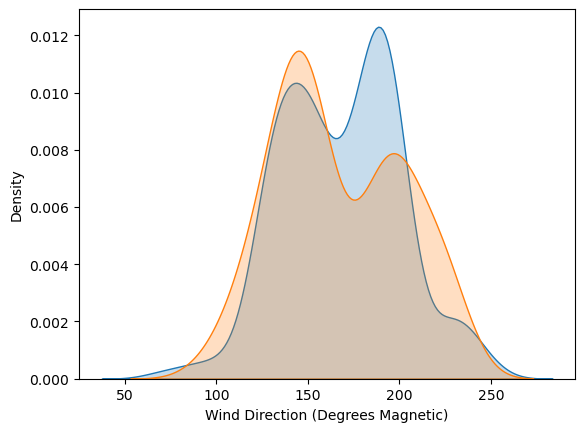

In [1477]:
sns.kdeplot(df2['Wind Direction (Degrees Magnetic)'],shade=True)
sns.kdeplot((ts03['Synthesised Wind Direction (Degrees Magnetic)']),shade=True)

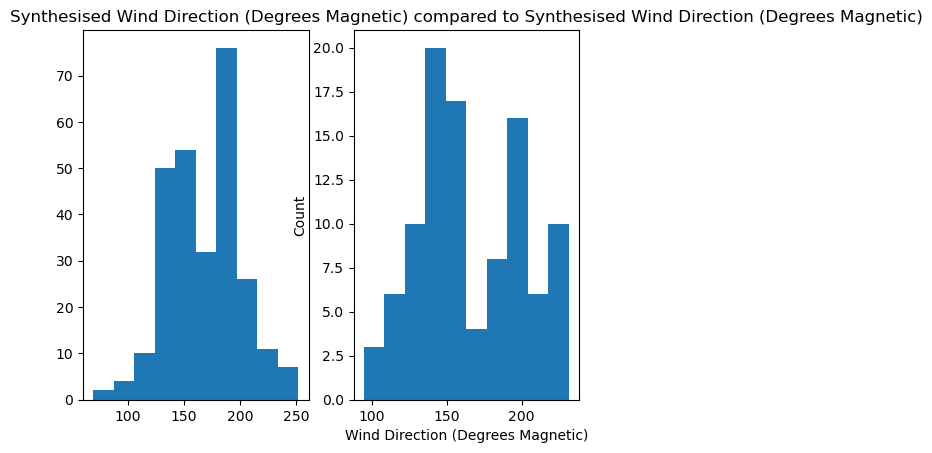

In [1478]:
plt.subplot(1,2,1)
plt.hist(df2["Wind Direction (Degrees Magnetic)"], bins =10)
plt.subplot(1,2,2)
plt.hist(ts03['Synthesised Wind Direction (Degrees Magnetic)'])
plt.title("Synthesised Wind Direction (Degrees Magnetic) compared to Synthesised Wind Direction (Degrees Magnetic)")
plt.xlabel("Wind Direction (Degrees Magnetic)")
plt.ylabel("Count")
plt.show()

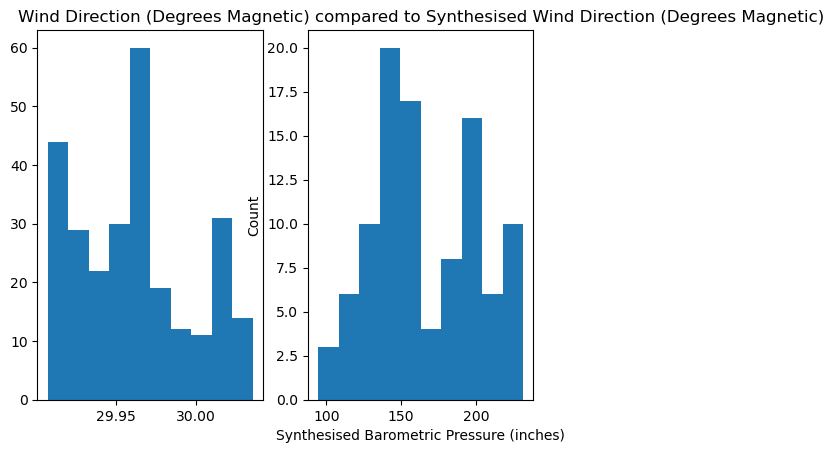

In [1479]:
plt.subplot(1,2,1)
plt.hist(df2["Barometric Pressure (inches)"], bins =10)
plt.subplot(1,2,2)
plt.hist(ts03["Synthesised Wind Direction (Degrees Magnetic)"], bins =10)
plt.title("Wind Direction (Degrees Magnetic) compared to Synthesised Wind Direction (Degrees Magnetic)")
plt.xlabel("Synthesised Barometric Pressure (inches)")
plt.ylabel("Count")
plt.show()

### wind speed knot

In [1480]:
mean = 13.728
std_dev = 5.782
shape = mean
scale = std_dev

np.random.seed(88)
#63,68,71,78,88
ts04 = pd.DataFrame(data = dweibull.rvs(2,shape, scale,len(idx1)),index =idx1, columns=['Synthesised knots'])

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

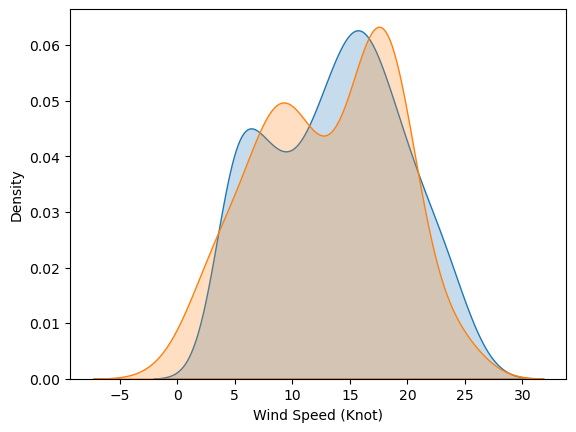

In [1481]:
sns.kdeplot(df2['Wind Speed (Knot)'],shade=True)
sns.kdeplot((ts04['Synthesised knots']),shade=True)

In [1482]:
rng=np.random.default_rng(seed=53)
#rng1 = np.random.default_rng()
mu1, sigma1 = 13.72, 5.78
ts004 = pd.DataFrame(data=rng.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised knots'])

<AxesSubplot:xlabel='Wind Speed (Knot)', ylabel='Density'>

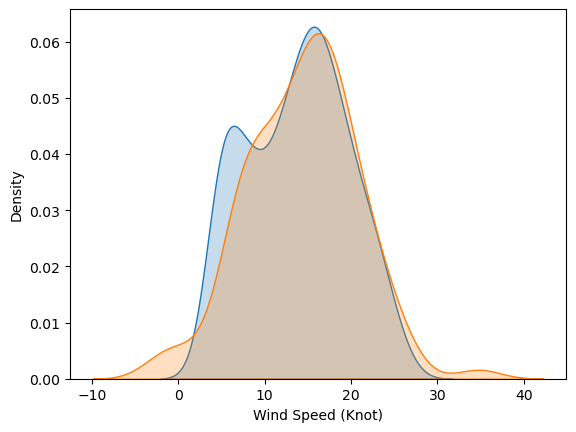

In [1483]:
sns.kdeplot(df2['Wind Speed (Knot)'],shade=True)
sns.kdeplot((ts004['Synthesised knots']),shade=True)

#code to check distributions
from scipy import stats
from fitter import Fitter
data = pd.read_csv('data.csv')
f = Fitter(data)
f.fit()
f.summary()


In [1484]:
df2.describe()


,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,272.000000,272.000000,272.000000,272.000000
mean,12.801838,29.962294,168.141912,13.728676
std,1.415816,0.034941,32.276567,5.782885
min,11.000000,29.908000,68.900000,3.600000
25%,11.700000,29.931600,142.875000,8.575000
50%,12.400000,29.961100,170.050000,14.200000
75%,13.900000,29.982525,191.100000,18.025000
max,17.500000,30.035000,252.200000,26.100000


some ditsributions i tried to to get a better distribution match.
1. standard cauchy
2. standard gamma
3. standard triangle
4. uniform
5. johnsonsu

###standard cauch code below taken from https://numpy.org/doc/stable/reference/random/generated/numpy.random.standard_cauchy.html. The min and max values were calculated in .describe() output.

Correlation coefficient: between Air Temperature (Degrees C) & Wind Speed (Knot) is  [[ 1.         -0.33065191]
 [-0.33065191  1.        ]]


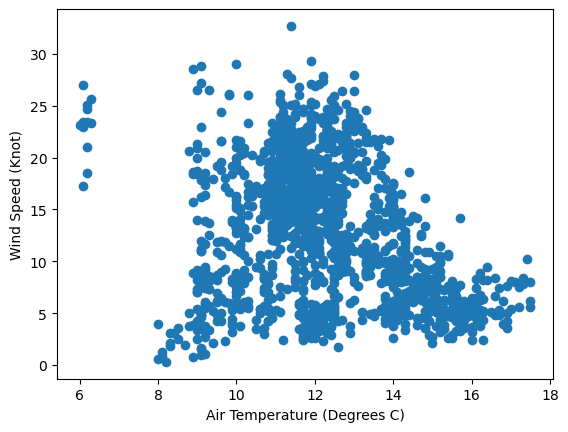

In [1485]:


x =df1["Air Temperature (Degrees C)"]
y =df1["Wind Speed (Knot)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Air Temperature (Degrees C) & Wind Speed (Knot) is ", r)
plt.scatter(x,y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Wind Speed (Knot)')
plt.show()


Correlation coefficient: between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) is  [[ 1.         -0.11180902]
 [-0.11180902  1.        ]]


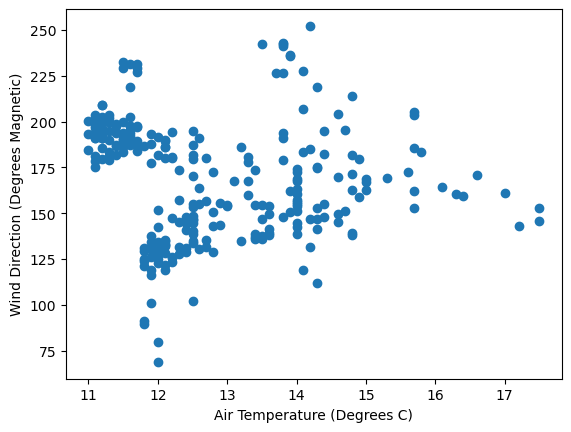

In [1486]:
x =df2["Air Temperature (Degrees C)"]
y =df2["Wind Direction (Degrees Magnetic)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Air Temperature (Degrees C) & Wind Direction (Degrees Magnetic) is ", r)
plt.scatter(x,y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Wind Direction (Degrees Magnetic)')
plt.show()

Correlation coefficient: between Air Temperature (Degrees C) & Barometric Pressure (inches) is  [[1.         0.21890284]
 [0.21890284 1.        ]]


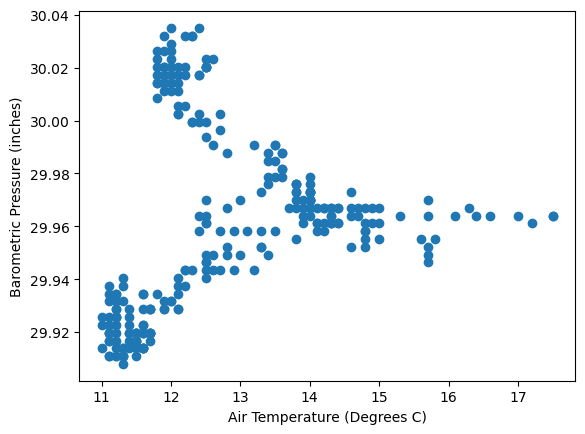

In [1487]:
x =df2["Air Temperature (Degrees C)"]
y =df2["Barometric Pressure (inches)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Air Temperature (Degrees C) & Barometric Pressure (inches) is ", r)
plt.scatter(x,y)
plt.xlabel('Air Temperature (Degrees C)')
plt.ylabel('Barometric Pressure (inches)')
plt.show()

Correlation coefficient: between Wind Direction (Degrees Magnetic) & Wind Speed (Knot) is  [[1.         0.22993643]
 [0.22993643 1.        ]]


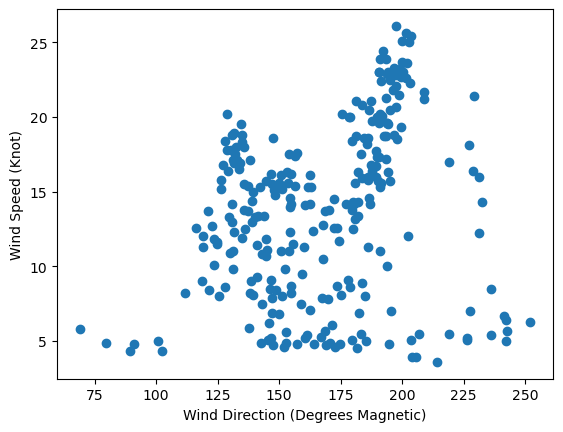

In [1488]:
x =df2["Wind Direction (Degrees Magnetic)"]
y =df2["Wind Speed (Knot)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Wind Direction (Degrees Magnetic) & Wind Speed (Knot) is ", r)
plt.scatter(x,y)
plt.xlabel('Wind Direction (Degrees Magnetic)')
plt.ylabel('Wind Speed (Knot)')
plt.show()

Correlation coefficient: between Wind Direction (Degrees Magnetic) & Barometric Pressure (inches) is  -0.7453638928778373


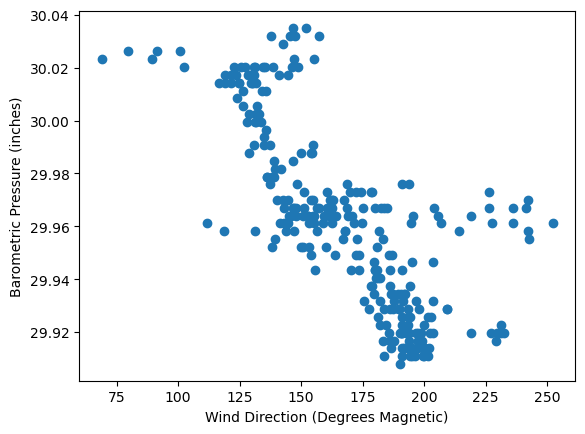

In [1489]:
x =df2["Wind Direction (Degrees Magnetic)"]
#x = df22["Barometric Pressure (inches)"]
y =df2["Barometric Pressure (inches)"]
r = np.corrcoef(x, y)[0,1]
print("Correlation coefficient: between Wind Direction (Degrees Magnetic) & Barometric Pressure (inches) is ", r)
plt.scatter(x,y)
plt.xlabel('Wind Direction (Degrees Magnetic)')
plt.ylabel('Barometric Pressure (inches)')
plt.show()

Correlation coefficient: between Wind Speed (Knot) & Barometric Pressure (inches) is  [[ 1.         -0.52554845]
 [-0.52554845  1.        ]]


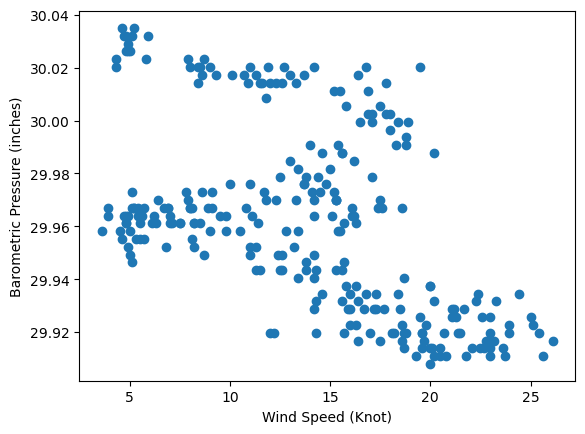

In [1490]:
x =df2["Wind Speed (Knot)"]
y =df2["Barometric Pressure (inches)"]
r = np.corrcoef(x, y)
print("Correlation coefficient: between Wind Speed (Knot) & Barometric Pressure (inches) is ", r)
plt.scatter(x,y)
plt.xlabel('Wind Speed (Knot)')
plt.ylabel('Barometric Pressure (inches)')
plt.show()

#standard gamma

for Air temp , Shape parameter (k) = 317.2792120103159
Scale parameter (theta) = 0.05614087677067406

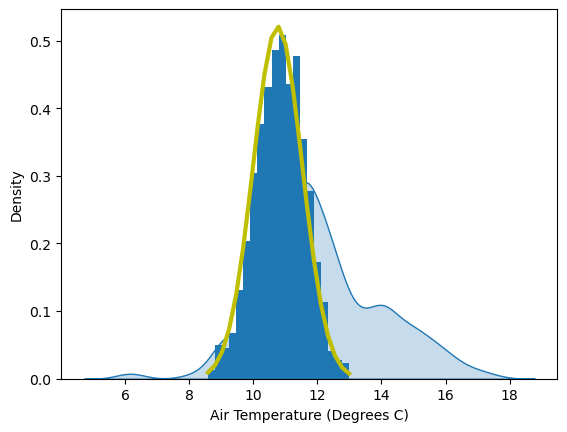

In [1491]:
mu, sigma = 10.76, .766
s = np.random.normal(mu, sigma, 1000) # Mean is 40 and std is 1.

# Create the bins and histogram
count, bins, ignored = plt.hist(s, 20, density=True)

# Plot the distribution curve
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *np.exp( - (bins - mu)**2 / (2 * sigma**2) ), linewidth=3, color='y')
sns.kdeplot(df1['Air Temperature (Degrees C)'],shade=True)
plt.show()

In [1492]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

In [1493]:
#sns.set(style="ticks", palette="colorblind")
#axes=plt.subplots(2,2, figsize=(9,9))
#sns.kdeplot(df3['Air Temperature (Degrees C)'], shade=True, label="simulated")
#sns.kdeplot(ts1['Synthesisd Air Temperature (Degrees C)'],shade=True, label="simulated")
#Air Temperature (Degrees C)

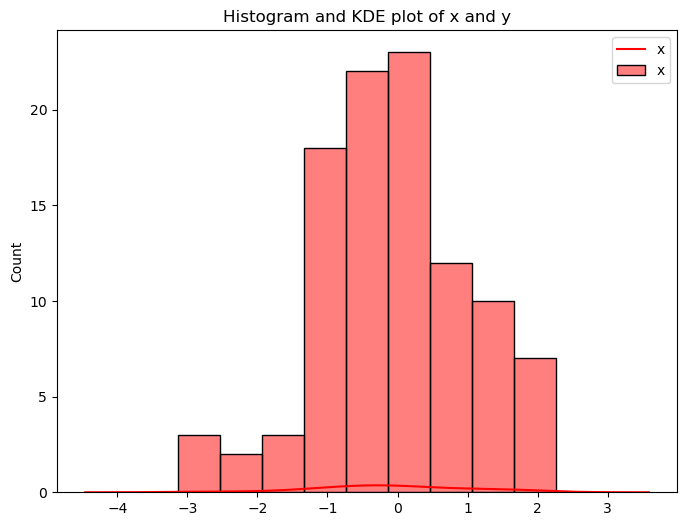

In [1494]:
x = np.random.normal(size=100)
#y = np.random.normal(size=100)
fig, ax = plt.subplots(figsize=(8, 6))

# Plot a histogram of x and y
sns.histplot(x=x, ax=ax, color='red', alpha=0.5, label='x')
#sns.histplot(x=y, ax=ax, color='green', alpha=0.5, label='y')

# Plot a KDE plot of x and y
sns.kdeplot(x=x, ax=ax, color='red', label='x')
#sns.kdeplot(x=y, ax=ax, color='green', label='y')

# Add legends and titles to the subplot
ax.legend()
ax.set_title('Histogram and KDE plot of x and y')

# Show the plot
plt.show()

In [1495]:
rng3 = np.random.default_rng()
shape = 5.0
scale = 2.0
values = weibull_min.rvs(shape, scale=scale, size=100)
#ts1 = pd.DataFrame(data=rng1.weibull(200,len(idx1)),index =idx1, columns=['Synthesises Weibull'])
#ts1

In [1496]:
rng1 = np.random.default_rng()
mu1, sigma1 = 267, 16.53
ts4 = pd.DataFrame(data=rng1.normal(mu1, sigma1,len(idx1)),index =idx1, columns=['Synthesised Wind direction'])
ts4

,Synthesised Wind direction
2023-11-08 00:00:33,229.669548
2023-11-08 00:01:33,260.701813
2023-11-08 00:02:33,282.095546
2023-11-08 00:03:33,291.349989
2023-11-08 00:04:33,269.771723
...,...
2023-11-08 01:35:33,264.550815
2023-11-08 01:36:33,271.318121
2023-11-08 01:37:33,248.946310
2023-11-08 01:38:33,255.921703


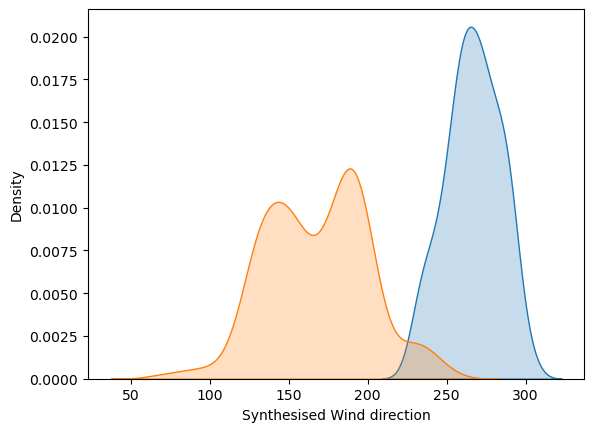

In [1497]:
sns.kdeplot(ts4['Synthesised Wind direction'],shade=True, label="simulated")
sns.kdeplot(df2['Wind Direction (Degrees Magnetic)'],shade=True)
plt.show()
#sns.histplot('Wind Direction (Degrees Magnetic)',kde = True)

In [1498]:
import numpy as np
dt = np.random.poisson(10.76, 100)
#dt

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

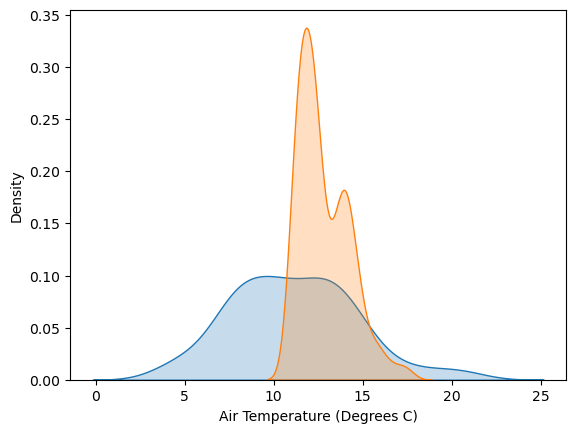

In [1499]:
sns.kdeplot((dt),shade=True, label="simulated")
sns.kdeplot(df2['Air Temperature (Degrees C)'],shade=True)

In [1500]:

values = np.random.rayleigh(10.76, 200)
#values

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

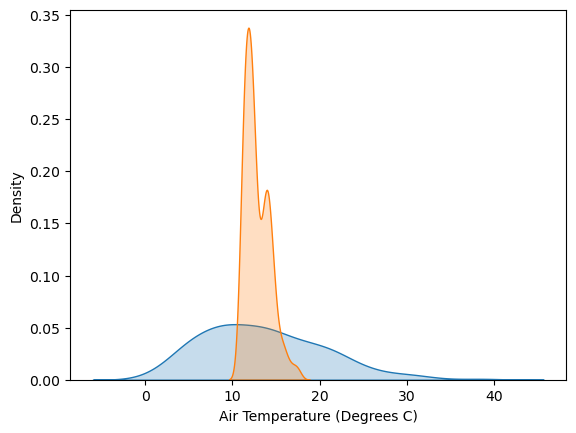

In [1501]:
sns.kdeplot((values),shade=True, label="simulated")
sns.kdeplot(df2['Air Temperature (Degrees C)'],shade=True)

In [1502]:
df2.describe()

,Air Temperature (Degrees C),Barometric Pressure (inches),Wind Direction (Degrees Magnetic),Wind Speed (Knot)
count,272.000000,272.000000,272.000000,272.000000
mean,12.801838,29.962294,168.141912,13.728676
std,1.415816,0.034941,32.276567,5.782885
min,11.000000,29.908000,68.900000,3.600000
25%,11.700000,29.931600,142.875000,8.575000
50%,12.400000,29.961100,170.050000,14.200000
75%,13.900000,29.982525,191.100000,18.025000
max,17.500000,30.035000,252.200000,26.100000


In [1503]:
result=pd.concat([ts01,ts02,ts002,ts03,ts04,ts004])
result.describe()

,Synthesised Air Temperature (Degrees C),Barometric,Synthesised Barometric,Synthesised Wind Direction (Degrees Magnetic),Synthesised knots
count,100.000000,100.000000,100.000000,100.000000,200.000000
mean,12.696648,29.960315,29.963627,166.702562,13.680959
std,1.393822,0.031720,0.033038,34.843580,6.139489
min,9.910551,29.899534,29.871438,94.541218,-2.376258
25%,11.608190,29.932635,29.943166,141.819330,8.939048
50%,12.249636,29.956247,29.963983,156.572962,14.403593
75%,13.953351,29.985142,29.987857,195.424043,18.125078
max,15.799559,30.032635,30.056511,231.520834,34.768919


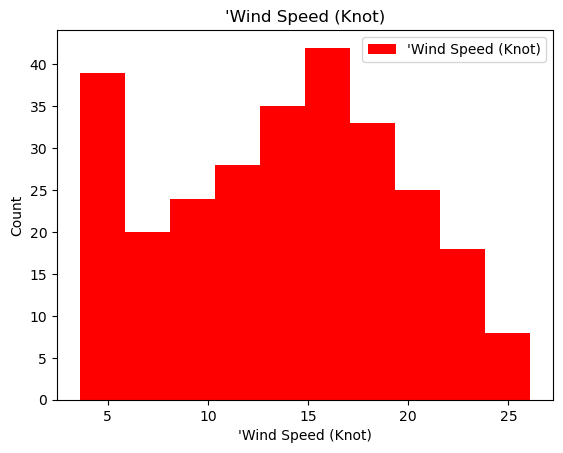

In [1504]:
a = df2['Wind Speed (Knot)']
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

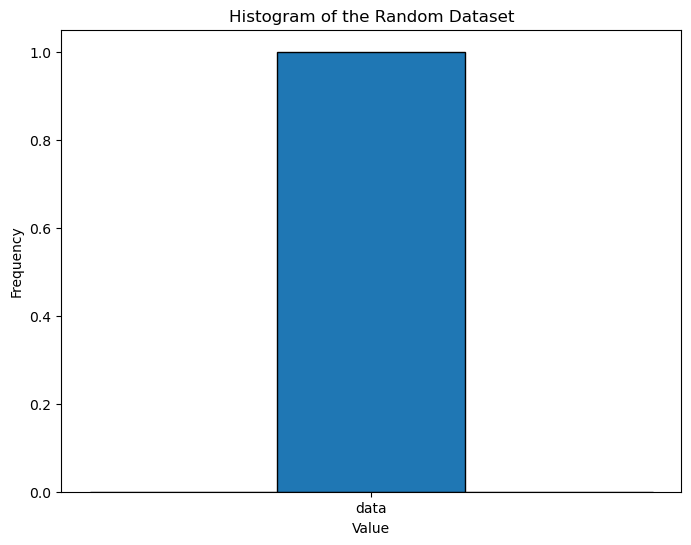

In [1505]:
plt.figure(figsize=(8, 6))
plt.hist('data', bins=3, edgecolor='k')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of the Random Dataset')
plt.show()

In [1506]:
idx = pd.date_range("2018-01-01", periods=100, freq="Y")


1.880765009414195 0 22.604615375739357


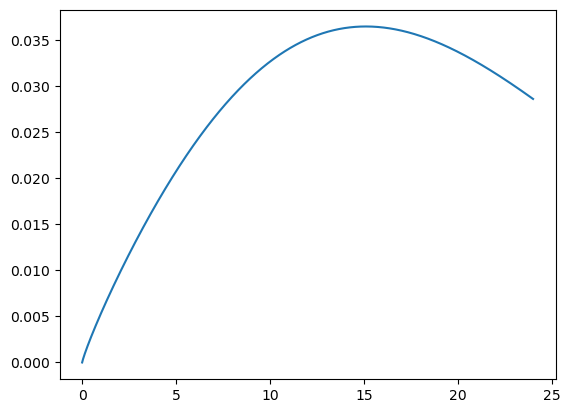

In [1507]:
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt


data = stats.weibull_min.rvs(2, loc=0, scale=24, size=100)

# Fit Weibull distribution
shape, loc, scale = stats.weibull_min.fit(data, floc=0)

# Print parameters
print(shape, loc, scale)

# Plot distribution
x = np.linspace(0, 24, 1000)
plt.plot(x, stats.weibull_min.pdf(x, shape, loc, scale))
plt.show()

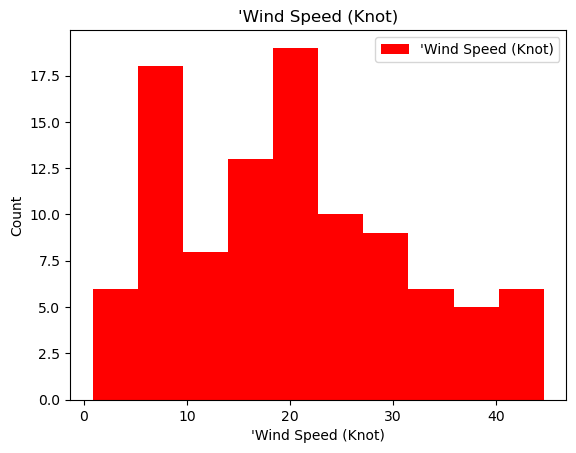

In [1508]:
a = data
plt.hist(a,  label = "Iris setosa", color = "red",alpha=1) 
plt.title("'Wind Speed (Knot)")
plt.xlabel("'Wind Speed (Knot)")
plt.ylabel("Count")
plt.legend(["'Wind Speed (Knot)"])
plt.show()

In [1509]:
result.describe()

,Synthesised Air Temperature (Degrees C),Barometric,Synthesised Barometric,Synthesised Wind Direction (Degrees Magnetic),Synthesised knots
count,100.000000,100.000000,100.000000,100.000000,200.000000
mean,12.696648,29.960315,29.963627,166.702562,13.680959
std,1.393822,0.031720,0.033038,34.843580,6.139489
min,9.910551,29.899534,29.871438,94.541218,-2.376258
25%,11.608190,29.932635,29.943166,141.819330,8.939048
50%,12.249636,29.956247,29.963983,156.572962,14.403593
75%,13.953351,29.985142,29.987857,195.424043,18.125078
max,15.799559,30.032635,30.056511,231.520834,34.768919


In [1511]:
#result = result[result.index.duplicated]
#sns.pairplot(result)

<AxesSubplot:xlabel='Air Temperature (Degrees C)', ylabel='Density'>

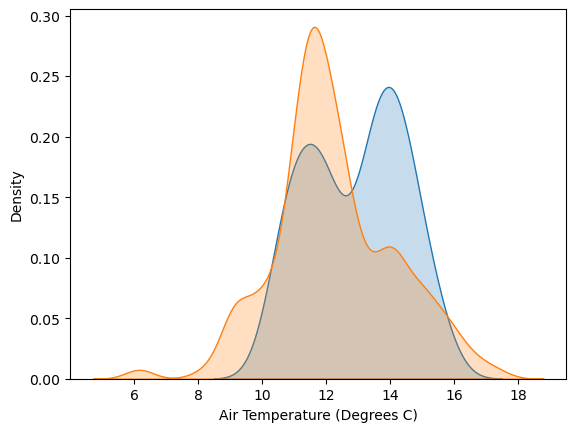

In [1512]:
import numpy as np
from scipy.stats import dweibull
mean = 12.80
std_dev = 1.41

# Generate 1000 random numbers from the double Weibull distribution
data = dweibull.rvs(2, loc=mean, scale=std_dev, size=100)

sns.kdeplot(data,shade=True)
sns.kdeplot(df1['Air Temperature (Degrees C)'],shade=True)


In [1513]:
# Load the dataset
import scipy.stats as scs
data = np.loadtxt('data.csv')

shape, loc, scale = weibull_min.fit(data)

#print(scs.johnsonsu.fit(data))
# Print the shape and scale parameters
#print('Shape parameter  =', shape)
print('Scale parameter  =',scale)
print('loc =', loc)
print('mean parameter  =',mean)
print('shape =', shape)

Scale parameter  = 1.2819879262364497
loc = 10.999999999999998
mean parameter  = 12.8
shape = 0.8502516800816302


In [1514]:

#Define the dataset

data = np.loadtxt('data.csv')

#Calculate the mode
mode = statistics.mode(data)

#Print the mode
print("The mode of the dataset is:", mode)

The mode of the dataset is: 12.5


<AxesSubplot:xlabel='Barometric Pressure (inches)', ylabel='Density'>

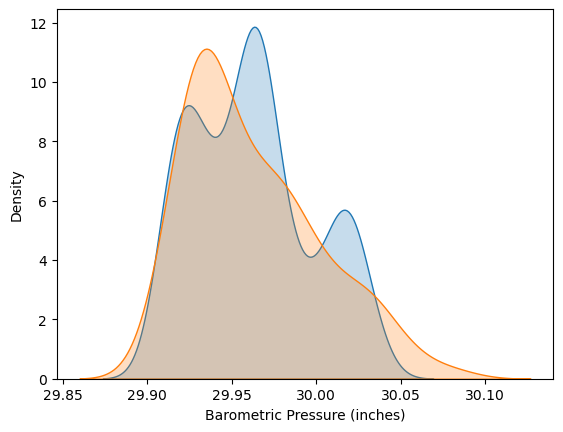

In [1515]:
from scipy.stats import weibull_min
import numpy as np

shape = 1.5530371839006853 # replace with your own shape parameter
scale = 0.06144800751378214 # replace with your own scale parameter
loc = 29.906810024869216

samples = weibull_min.rvs(shape, loc, scale=scale, size=100)
sns.kdeplot(df2['Barometric Pressure (inches)'],shade=True, label="actual")
sns.kdeplot(samples,shade=True, label="actual")

End